# Visualization Notebook

In this notebook I hope to make the structure of the data that we are dealing with clearer. I will do this by plotting the data initially and then showing you how to clean the data so that we have it formatted in a nice way for training.

The actual cleaning is done in the python file convert_data (which I import here for one function). You can just use the images_and_labels function from this file for cleaning when we actually get to training the data as shown below
```py
from convert_data import images_and_labels
images, labels = images_and_labels() #no arguments needed for this function for this dataset
```

So this notebook is just so that you can see why we call this function and how it gives us the images and labels.




In [41]:
import numpy as np
np.random.seed(7)
import pandas as pd 
import h5py

from convert_data import get_data, add_ones_or_zeros #from custom python file

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize, LogNorm

from sklearn.utils import shuffle


### Plotting images
The next couple blocks load and plot the data for both signal and background images. The get_data function takes in our hdf5 files and converts them to numpy arrays. 

For plotting we normalize our images by the minmum and maximum values that we see for each set of background and signal data to get a sense of the density of energy in our images. Our axis y-axis is $\eta$ and our x-axis is $\phi$ 

In [42]:
gTowerEt_background1 = get_data("JZ0W_hdf5/user._010556.JZ0W.hdf5")
gTowerEt_background2 = get_data("JZ0W_hdf5/user._010590.JZ0W.hdf5")
gTowerEt_background3 = get_data("JZ0W_hdf5/user._010592.JZ0W.hdf5")
gTowerEt_background4 = get_data("JZ0W_hdf5/user._010594.JZ0W1.hdf5")
gTowerEt_background = np.concatenate([gTowerEt_background1
                                  ,gTowerEt_background2
                                  ,gTowerEt_background3
                                  ,gTowerEt_background4])

In [43]:
gTowerEt_signal1 = get_data("ZvvHbb_hdf5/user._000118.ZvvHbb.hdf5")
gTowerEt_signal2 = get_data("ZvvHbb_hdf5/user._000123.ZvvHbb.hdf5")
gTowerEt_signal3 = get_data("ZvvHbb_hdf5/user._000130.ZvvHbb.hdf5")
gTowerEt_signal4 = get_data("ZvvHbb_hdf5/user._000139.ZvvHbb.hdf5")
gTowerEt_signal = np.concatenate([gTowerEt_signal1
                                 ,gTowerEt_signal2
                                 ,gTowerEt_signal3
                                 ,gTowerEt_signal4])

(1000, 28, 32)


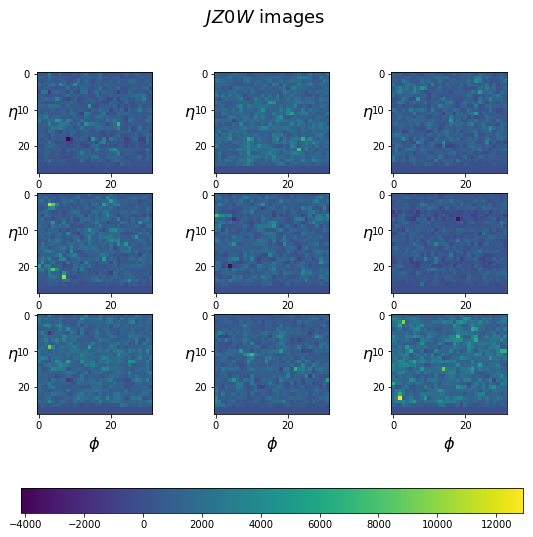

In [44]:
f, axarr = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
f.suptitle("$JZ0W$ images", fontsize = 18)
print(gTowerEt_background.shape)
    
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[2,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)


axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[0,2].set_xlabel("$\phi$", fontsize=16)

axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,2].set_xlabel("$\phi$", fontsize=16)

axarr[2,0].set_xlabel("$\phi$", fontsize=16)
axarr[2,1].set_xlabel("$\phi$", fontsize=16)
axarr[2,2].set_xlabel("$\phi$", fontsize=16)


#These get the minumum and maximum values from our cell
vmin = min(gTowerEt_background[0].min(), 
           gTowerEt_background[1].min(), 
           gTowerEt_background[2].min(), 
           gTowerEt_background[3].min(),
           gTowerEt_background[4].min(),
           gTowerEt_background[5].min(),
           gTowerEt_background[6].min(),
           gTowerEt_background[7].min(),
           gTowerEt_background[8].min(),
           )

vmax = max(gTowerEt_background[0].max(), 
           gTowerEt_background[1].max(), 
           gTowerEt_background[2].max(), 
           gTowerEt_background[3].max(),
           gTowerEt_background[4].max(), 
           gTowerEt_background[5].max(), 
           gTowerEt_background[6].max(), 
           gTowerEt_background[7].max(),
           gTowerEt_background[8].max()
          )

g0 = axarr[0,0].imshow(gTowerEt_background[0])
g1 = axarr[0,1].imshow(gTowerEt_background[1])
g2 = axarr[0,2].imshow(gTowerEt_background[2])

g3 = axarr[1,0].imshow(gTowerEt_background[3])
g4 = axarr[1,1].imshow(gTowerEt_background[4])
g5 = axarr[1,2].imshow(gTowerEt_background[5])

g6 = axarr[2,0].imshow(gTowerEt_background[6])
g7 = axarr[2,1].imshow(gTowerEt_background[7])
g8 = axarr[2,2].imshow(gTowerEt_background[8])

#This normalizes the pixels of our images 
norm = colors.Normalize(vmin=vmin, vmax=vmax)

g0.set_norm(norm)
g1.set_norm(norm)
g2.set_norm(norm)
g3.set_norm(norm)
g4.set_norm(norm)
g5.set_norm(norm)
g6.set_norm(norm)
g7.set_norm(norm)
g8.set_norm(norm)

f.colorbar(g0, ax = axarr, orientation='horizontal')

plt.show()

(1000, 28, 32)


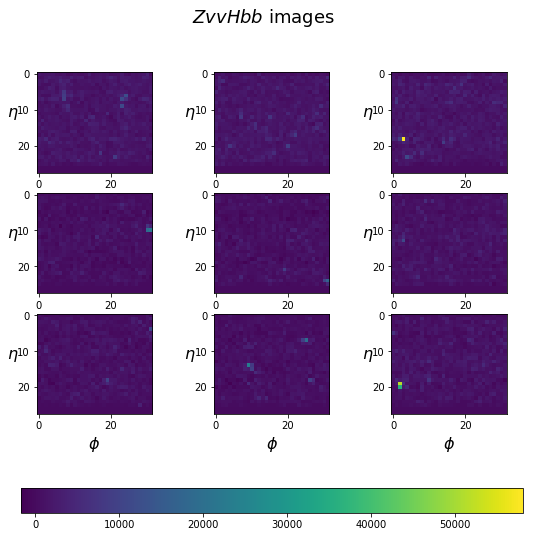

In [45]:
g, axarr = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
g.suptitle("$ZvvHbb$ images", fontsize = 18)
print(gTowerEt_signal.shape)
    
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[2,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)


axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[0,2].set_xlabel("$\phi$", fontsize=16)

axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,2].set_xlabel("$\phi$", fontsize=16)

axarr[2,0].set_xlabel("$\phi$", fontsize=16)
axarr[2,1].set_xlabel("$\phi$", fontsize=16)
axarr[2,2].set_xlabel("$\phi$", fontsize=16)


vmin = min(gTowerEt_signal[0].min(), 
           gTowerEt_signal[1].min(), 
           gTowerEt_signal[2].min(), 
           gTowerEt_signal[3].min(),
           gTowerEt_signal[4].min(),
           gTowerEt_signal[5].min(),
           gTowerEt_signal[6].min(),
           gTowerEt_signal[7].min(),
           gTowerEt_signal[8].min(),
           )

vmax = max(gTowerEt_signal[0].max(), 
           gTowerEt_signal[1].max(), 
           gTowerEt_signal[2].max(), 
           gTowerEt_signal[3].max(),
           gTowerEt_signal[4].max(), 
           gTowerEt_signal[5].max(), 
           gTowerEt_signal[6].max(), 
           gTowerEt_signal[7].max(),
           gTowerEt_signal[8].max()
          )

g0 = axarr[0,0].imshow(gTowerEt_signal[0])
g1 = axarr[0,1].imshow(gTowerEt_signal[1])
g2 = axarr[0,2].imshow(gTowerEt_signal[2])

g3 = axarr[1,0].imshow(gTowerEt_signal[3])
g4 = axarr[1,1].imshow(gTowerEt_signal[4])
g5 = axarr[1,2].imshow(gTowerEt_signal[5])

g6 = axarr[2,0].imshow(gTowerEt_signal[6])
g7 = axarr[2,1].imshow(gTowerEt_signal[7])
g8 = axarr[2,2].imshow(gTowerEt_signal[8])

norm = colors.Normalize(vmin=vmin, vmax=vmax)

g0.set_norm(norm)
g1.set_norm(norm)
g2.set_norm(norm)
g3.set_norm(norm)
g4.set_norm(norm)
g5.set_norm(norm)
g6.set_norm(norm)
g7.set_norm(norm)
g8.set_norm(norm)

g.colorbar(g0, ax = axarr, orientation='horizontal')

plt.show()

### Removing Null blocks of data 
We can see a consistent set of zero pixels at the bottom of all of our images. I think that this is a buffer between images but I am not entirely sure. It could also be due to the fact that we are only looking at certain $\eta$ values so we are just not reading the other $\eta$ values at all and simply registering that in our images.

Nevertheless, it has to be removed for training since we want to train and a full image and not one with a consistent error in it. So in the below lines we see exactly where the data cuts off and remove it for both signal and background images.

In [46]:
gTower_signal_flat = flatten_data(gTowerEt_signal, 28*32)
gTower_background_flat = flatten_data(gTowerEt_background, 28*32)

# check what the data looks like now
print("shapes:\n signal:{}\n background {}".format(gTower_signal_flat.shape, gTower_background_flat.shape))

# convert to a pandas data frame
df_signal_flat = pd.DataFrame(gTower_signal_flat)
df_background_flat = pd.DataFrame(gTower_background_flat)

#check what the data looks like
print("Row 832 is the last row in signal with all zeros: sum(832) = {}".format(df_signal_flat[832].sum()))
print("Row 831 is the first row in sgnal with not all zeros: sum(831) = {}".format(df_signal_flat[831].sum()))

#drop zero columns
df_signal_flat.drop(df_signal_flat.columns[832:], axis=1, inplace=True)

print("Row 832 is the last row in background with all zeros: sum(832) = {}".format(df_background_flat[832].sum()))
print("Row 831 is the first row in background with not all zeros: sum(831) = {}".format(df_background_flat[831].sum()))

#drop zero columns
df_background_flat.drop(df_background_flat.columns[832:], axis=1, inplace=True)

df_signal_flat.head()

shapes:
 signal:(1000, 896)
 background (1000, 896)
Row 832 is the last row in signal with all zeros: sum(832) = 0.0
Row 831 is the first row in sgnal with not all zeros: sum(831) = 568013.125
Row 832 is the last row in background with all zeros: sum(832) = 0.0
Row 831 is the first row in background with not all zeros: sum(831) = 499746.78125


,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,1948.007568,1229.803589,1362.211670,1773.021362,1805.363159,937.377747,770.113647,1283.386475,0.000000,463.752502,...,1453.622314,1195.590210,991.512695,595.912720,180.354721,337.931519,828.340332,862.571777,830.117065,797.693115
1,504.729767,1053.224731,1948.789429,472.535736,431.983521,1618.163696,1084.297852,522.354248,1145.151978,884.213806,...,674.066772,1018.593689,2172.189453,1589.266357,1166.685791,845.343872,433.920105,595.932251,2259.294922,1107.355469
2,949.828003,716.895020,123.326370,945.230530,718.803589,65.158417,812.612000,702.350159,560.865112,1201.162842,...,394.760132,0.000000,322.434998,591.893433,846.602661,-170.080933,975.725342,134.924530,3593.008057,1467.026855
3,226.033798,-61.546230,538.230469,27.106960,0.000000,177.788284,159.796814,568.038025,154.135437,0.000000,...,114.888306,78.900848,1171.467407,0.719444,492.379333,1436.708984,138.477692,80.839256,73.998993,-30.185978
4,-151.946899,429.102966,270.738861,205.938675,233.599579,532.302063,735.905396,104.528160,657.799927,-145.565964,...,344.546844,78.911766,1261.254395,620.452209,251.628922,482.965149,1691.376953,29.792877,784.313354,5042.091797


In [47]:
df_background_flat.head()

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,102.223244,368.700684,137.223206,3186.571777,3.529137,0.000000,1580.153198,88.257584,241.882187,132.519989,...,-174.814178,1479.688599,442.842407,763.384705,183.145950,307.035736,380.927002,444.837280,524.020386,197.409546
1,1862.122681,725.858398,495.343079,522.689270,1037.605713,1459.342163,1467.959839,951.591431,1289.745483,0.000000,...,1474.365601,754.765991,804.412048,987.892090,949.158386,317.838837,1316.921509,711.112122,566.910278,1134.835327
2,1338.201538,63.295807,1250.506104,1.934196,105.690559,1010.898010,814.236450,68.646568,-44.988132,871.175598,...,128.142059,99.144165,91.923775,337.149536,-27.088104,296.295044,826.219788,259.561218,504.078888,118.668991
3,508.373199,357.868134,54.637264,761.106384,240.089447,100.703369,477.226807,444.954498,702.838623,109.055504,...,524.925659,1218.190186,0.000000,983.982910,704.678345,472.131653,111.450127,762.669006,20.642662,627.526917
4,1759.074219,1074.358521,51.794151,659.456604,-419.165039,619.112854,219.199036,487.793335,622.421021,32.543133,...,678.214233,395.708679,401.175659,570.642761,652.222168,319.069214,204.106003,1265.324707,103.765228,440.996307


In [48]:
df_signal_with_label = add_ones_or_zeros(df_signal_flat, 1)
df_background_with_label = add_ones_or_zeros(df_background_flat, 0)

#this is just a sanity check to make sure that we added all of the ones and zeros correctly to our images

assert(df_signal_with_label["832"].sum() == 1000.0 and df_background_with_label["832"].sum() == 0.0)

In [49]:
df = pd.concat([df_background_with_label, df_signal_with_label]) #combine the datasets 

In [50]:
from sklearn.utils import shuffle #shuffle datasets so the aren't all lumped together for training
df = shuffle(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,832
72,617.601318,1025.455811,0.000000,1011.240295,99.958839,333.287323,1539.869385,1168.764648,738.572998,372.952454,...,134.856674,-10.657075,26.755604,2667.298828,499.250366,27.744547,1043.870361,326.671387,1146.979004,1.0
48,2.102772,723.881165,296.339325,356.064789,543.670959,457.909302,764.226318,331.417816,760.755249,-15.101002,...,336.678497,29.638662,690.665833,660.871948,482.679749,848.962769,121.525925,280.449341,1931.817627,1.0
204,528.239075,186.798325,-79.647118,-66.266968,281.066620,62.878704,95.930397,0.000000,515.882568,289.449341,...,245.353912,92.703529,127.512253,-160.476349,213.109863,488.552246,555.118774,304.462646,161.072601,0.0
694,2684.563232,2531.401123,692.038208,242.560425,1206.665771,996.734131,335.721771,378.905792,496.130066,796.467285,...,507.889740,137.892517,827.784912,1302.798584,329.696167,810.409546,637.320984,674.380676,970.458496,0.0
758,473.478973,251.773315,124.237930,524.202026,28.579481,109.355637,663.056824,176.261261,42.052715,105.625214,...,427.932251,806.014404,334.009796,560.595093,241.998962,306.200806,454.349487,135.056351,367.607117,1.0


In [51]:
labels = df['832']
labels = np.array(labels)
print(labels[:10]) #check that labels are shuffled

[1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [52]:
df.drop(df.columns[832], axis=1, inplace=True)
images = np.array(df)
print(len(images[0])) #check that our images are still the same size

832


### Final Vizualization

Now we are going to reshape our images to check that they have no null rows, that they have the correct labels, and that they are shuffled.

In [53]:
images_reshaped = images[:].reshape(-1, 26, 32) 

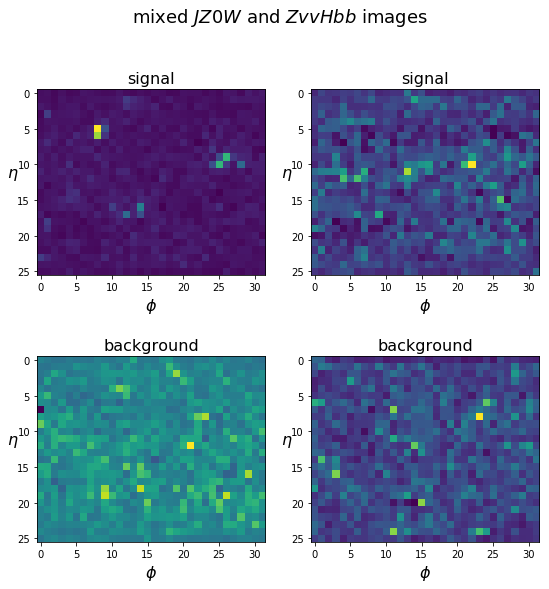

In [54]:
def signal_or_background(label):
    """
        Tells us if the image is signal or background for plotting
    """
    if label == 0.0:
        return "background"
    else:
        return "signal"


f, axarr = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
f.suptitle("mixed $JZ0W$ and $ZvvHbb$ images", fontsize = 18)
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)

axarr[0,0].set_title("{}".format(signal_or_background(labels[0])), fontsize=16)
axarr[0,1].set_title("{}".format(signal_or_background(labels[1])), fontsize=16)
axarr[1,0].set_title("{}".format(signal_or_background(labels[2])), fontsize=16)
axarr[1,1].set_title("{}".format(signal_or_background(labels[3])), fontsize=16)

axarr[0,0].imshow(images_reshaped[0])
axarr[0,1].imshow(images_reshaped[1])
axarr[1,0].imshow(images_reshaped[2])
axarr[1,1].imshow(images_reshaped[3])

plt.show()

This isn't as clear since the images aren't normalized, but for the most part one can see that we have cleaned the data successfully so that they all have no null rows, they all have labels, and they are shuffled.